# Prabin Lamsal
# CE 
# Artificial Neural Networks

## Building a perceptron based classifier

We will be using neurolab-a library of basic neural networks algorithms with flexible network configurations and learning algorithms for Python.  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [ ]:
import numpy as np

In [ ]:
# Loading input data
text = np.loadtxt('data_perceptron.txt')

In [ ]:
# Separating datapoints and labels
data = text[:, :2]
labels = text[:, 2].reshape((text.shape[0], 1))

Text(0.5, 1.0, 'Input data')

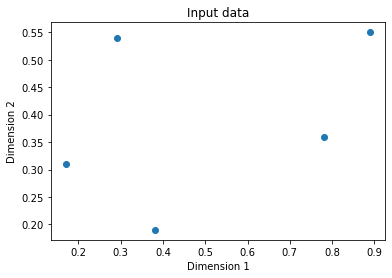

In [ ]:
# Plotting input data
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [ ]:
# Define minimum and maximum values for each dimension
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1

In [ ]:
# Number of neurons in the output layer
num_output = labels.shape[1]

In [ ]:
# Define a perceptron with 2 input neurons (because we have 2 dimensions in the input data)
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1, dim2], num_output)

In [ ]:
# Train the perceptron using the data
error_progress = perceptron.train(data, labels, epochs=100, show=20,
lr=0.03)

The goal of learning is reached


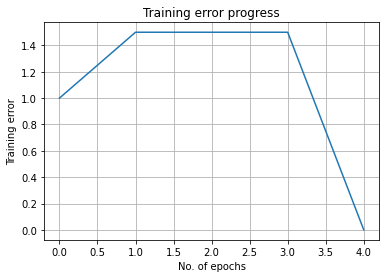

In [ ]:
# Plot the training progress using the error metric:
plt.figure()
plt.plot(error_progress)
plt.xlabel('No. of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()
plt.show()

We can observe from the preceding screenshot, the error goes down to 0 at the end of the
fourth epoch.

## Constructing a single layer neural network

In [ ]:
# Loading input data
text = np.loadtxt('data_simple_nn.txt')

In [ ]:
# Separating it into datapoints and labels
data = text[:, 0:2]
labels = text[:, 2:]

Text(0.5, 1.0, 'Input data')

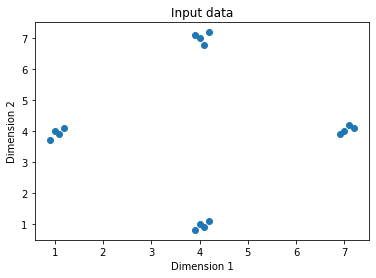

In [ ]:
# Plotting input data
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [ ]:
# Minimum and maximum values for each dimension
dim1_min, dim1_max = data[:,0].min(), data[:,0].max()
dim2_min, dim2_max = data[:,1].min(), data[:,1].max()

In [ ]:
# Defining the number of neurons in the output layer
num_output = labels.shape[1]

In [ ]:
# Defining a single-layer neural network
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
nn = nl.net.newp([dim1, dim2], num_output)

In [ ]:
# Training the neural network
error_progress = nn.train(data, labels, epochs=100, show=20, lr=0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


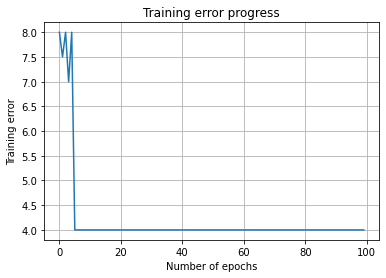

In [ ]:
# Plotting the training progress
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error progress')
plt.grid()
plt.show()

In [ ]:
# Running the classifier on test datapoints
print('\nTest results:')
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]]
for item in data_test:
    print(item, '-->', nn.sim([item])[0])


Test results:
[0.4, 4.3] --> [0. 0.]
[4.4, 0.6] --> [1. 0.]
[4.7, 8.1] --> [1. 1.]


## Constructing a multilayer neural network

In [ ]:
# Generating some training data
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

In [ ]:
# Creating data and labels
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

Text(0.5, 1.0, 'Input data')

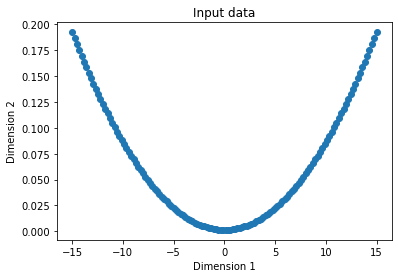

In [ ]:
# Plotting input data
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [ ]:
# Defining a multilayer neural network with 2 hidden layers;
# First hidden layer consists of 10 neurons, Second hidden layer consists of 6 neurons, Output layer consists of 1 neuron
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])

In [ ]:
# Setting the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

In [ ]:
# Training the neural network
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 0.8193729404675041;
Epoch: 200; Error: 0.05620616047455615;
Epoch: 300; Error: 0.012908038231201499;
Epoch: 400; Error: 0.011791571808304209;
Epoch: 500; Error: 0.025435402096388695;
Epoch: 600; Error: 0.01820282323326288;
Epoch: 700; Error: 0.01316645308072955;
Epoch: 800; Error: 0.011330792586799879;
Epoch: 900; Error: 0.06210409534400023;
Epoch: 1000; Error: 0.06763845047521526;
Epoch: 1100; Error: 0.03517921921256195;
Epoch: 1200; Error: 0.03091091229560957;
Epoch: 1300; Error: 0.026836798444117314;
Epoch: 1400; Error: 0.01694363689849035;
Epoch: 1500; Error: 0.021159033905845115;
Epoch: 1600; Error: 0.011125227833918564;
Epoch: 1700; Error: 0.010066873127074086;
The goal of learning is reached


In [ ]:
# Running the neural network on training datapoints
output = nn.sim(data)
y_pred = output.reshape(num_points)

Text(0.5, 1.0, 'Training error progress')

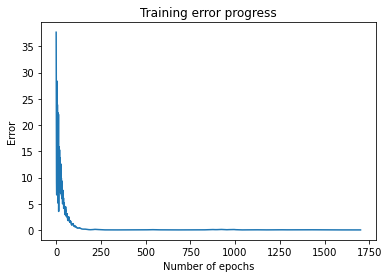

In [ ]:
# Plottingtraining error
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

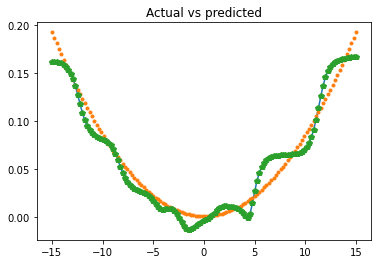

In [ ]:
# Plotting the output
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')
plt.show()

## Building a vector quantizer

In [ ]:
# Loading input data
text = np.loadtxt('data_vector_quantization.txt')

In [ ]:
# Separating it into data and labels
data = text[:, 0:2]
labels = text[:, 2:]

In [ ]:
data

array([[0.9, 5.1],
       [1.2, 4.8],
       [1. , 4.9],
       [0.8, 5.2],
       [8. , 4.1],
       [8.2, 4.3],
       [7.9, 3.8],
       [8.3, 4.3],
       [5. , 1.1],
       [5.1, 0.8],
       [5.3, 1.2],
       [4.9, 0.9],
       [5. , 7. ],
       [5.2, 7.2],
       [4.9, 7.1],
       [5.1, 6.8]])

In [ ]:
labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
# Defining a neural network with 2 layers: 10 neurons in input layer and 4 neurons in output layer
num_input_neurons = 10
num_output_neurons = 4
weights = [1/num_output_neurons] * num_output_neurons
nn = nl.net.newlvq(nl.tool.minmax(data), num_input_neurons, weights)

In [ ]:
# Training the neural network
_ = nn.train(data, labels, epochs=500, goal=-1)

Epoch: 100; Error: 0.0;
Epoch: 200; Error: 0.0;
Epoch: 300; Error: 0.0;
Epoch: 400; Error: 0.0;
Epoch: 500; Error: 0.0;
The maximum number of train epochs is reached


In [ ]:
# Creating the input grid to visualize the output clusters
xx, yy = np.meshgrid(np.arange(0, 10, 0.2), np.arange(0, 10, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
grid_xy = np.concatenate((xx, yy), axis=1)

In [ ]:
# Evaluating the input grid of points using the neural network
grid_eval = nn.sim(grid_xy)

In [ ]:
# Defining/extracting the 4 classes
class_1 = data[labels[:,0] == 1]
class_2 = data[labels[:,1] == 1]
class_3 = data[labels[:,2] == 1]
class_4 = data[labels[:,3] == 1]

In [ ]:
# Defining X-Y grids corresponding to the 4 classes
grid_1 = grid_xy[grid_eval[:,0] == 1]
grid_2 = grid_xy[grid_eval[:,1] == 1]
grid_3 = grid_xy[grid_eval[:,2] == 1]
grid_4 = grid_xy[grid_eval[:,3] == 1]

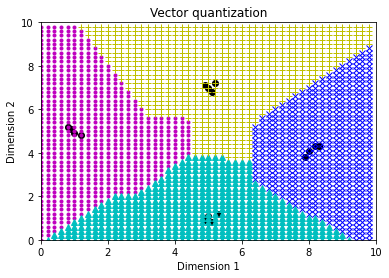

In [ ]:
# Plot the outputs
plt.plot(class_1[:,0], class_1[:,1], 'ko', class_2[:,0], class_2[:,1], 'ko',class_3[:,0], class_3[:,1], 'ko',class_4[:,0], class_4[:,1], 'ko')
plt.plot(grid_1[:,0], grid_1[:,1], 'm.',grid_2[:,0], grid_2[:,1], 'bx',grid_3[:,0], grid_3[:,1], 'c^',grid_4[:,0], grid_4[:,1], 'y+')
plt.axis([0, 10, 0, 10])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vector quantization')
plt.show()

## Analyzing sequential data using recurrent neural networks

In [ ]:
# Defining a function to generate the waveforms
def get_data(num_points):
    # Creating sine waveforms
    wave_1 = 0.5 * np.sin(np.arange(0, num_points))
    wave_2 = 3.6 * np.sin(np.arange(0, num_points))
    wave_3 = 1.1 * np.sin(np.arange(0, num_points))
    wave_4 = 4.7 * np.sin(np.arange(0, num_points))
    
    # Creating varying amplitudes for the overall waveform
    amp_1 = np.ones(num_points)
    amp_2 = 2.1 + np.zeros(num_points)
    amp_3 = 3.2 * np.ones(num_points)
    amp_4 = 0.8 + np.zeros(num_points)
    
    # Creating the overall waveform
    wave = np.array([wave_1, wave_2, wave_3, wave_4]).reshape(num_points *4, 1)
    amp = np.array([[amp_1, amp_2, amp_3, amp_4]]).reshape(num_points * 4,1)
    return wave, amp

In [ ]:
num_points = 40
wave, amp = get_data(num_points)

In [ ]:
# Visualizing the output of the neural network
def visualize_output(nn, num_points_test):
    wave, amp = get_data(num_points_test)
    output = nn.sim(wave)
    plt.plot(amp.reshape(num_points_test * 4))
    plt.plot(output.reshape(num_points_test * 4))

In [ ]:
# Creating a recurrent neural network with 2 layers
nn = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(),
nl.trans.PureLin()])


In [ ]:
# Setting the init functions for each layer
nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.init()

In [ ]:
# Training the recurrent neural network
error_progress = nn.train(wave, amp, epochs=1200, show=100, goal=0.01)

Epoch: 100; Error: 0.869074052568835;
Epoch: 200; Error: 0.6305915602613057;
Epoch: 300; Error: 0.630083677529387;
Epoch: 400; Error: 0.19385115251408053;
Epoch: 500; Error: 0.05167376454523144;
Epoch: 600; Error: 0.045292154005858856;
Epoch: 700; Error: 0.03693733459883715;
Epoch: 800; Error: 0.03347662695976318;
Epoch: 900; Error: 0.02620567792955006;
Epoch: 1000; Error: 0.023014410650567686;
Epoch: 1100; Error: 0.021584368963436303;
Epoch: 1200; Error: 0.02017587959419705;
The maximum number of train epochs is reached


In [ ]:
# Running the training data through the network
output = nn.sim(wave)

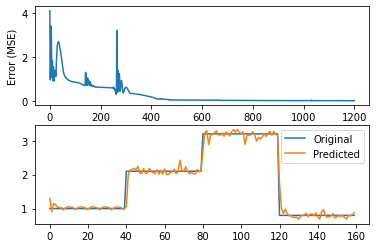

In [ ]:
# Plotting the results
plt.subplot(211)
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error (MSE)')
plt.subplot(212)
plt.plot(amp.reshape(num_points * 4))
plt.plot(output.reshape(num_points * 4))
plt.legend(['Original', 'Predicted'])

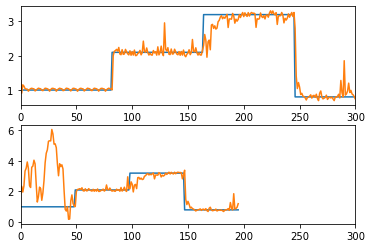

In [ ]:
# Testing the network performance on unknown data
plt.figure()
plt.subplot(211)
visualize_output(nn,82)
plt.xlim([0, 300])
plt.subplot(212)
visualize_output(nn,49)
plt.xlim([0, 300])
plt.show()

## Visualizing characters in an Optical Character Recognition database

In [ ]:
import os
import sys
import cv2

In [ ]:
# Defining the input file/database with characters
input_file = 'letter.data'

In [ ]:
# Defining the visualization parameters
img_resize_factor = 12
start = 6
end = -1
height, width = 16, 8

In [ ]:
# Iterating until the user presses the Esc key
with open(input_file, 'r') as f:
    for line in f.readlines():
        # Reading the data
        data = np.array([255 * float(x) for x in line.split('\t')[start:end]])
        # Reshaping the data into a 2D image
        img = np.reshape(data, (height, width))
        # Scaling the image
        img_scaled = cv2.resize(img, None, fx=img_resize_factor, fy=img_resize_factor)
        # Displaying the image
        cv2.imshow('Image', img_scaled)
        # Checking if the user pressed the Esc key
        c = cv2.waitKey()
        if c == 27:
            break

### Sample Outputs

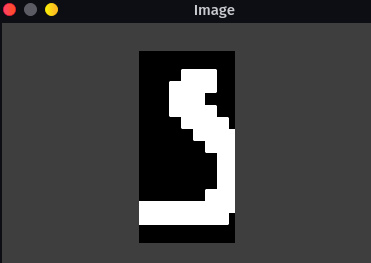

In [ ]:
from IPython.display import Image
#word - S
Image("img/s.png")

## Building an Optical Character Recognition Engine

Now that we have learned how to work with this data, we'll now build an optical character
recognition system using artificial neural networks.

In [ ]:
# We will be using the same input file as above
input_file = 'letter.data'

In [ ]:
num_datapoints = 50

In [ ]:
# String containing all the distinct characters
orig_labels = 'omandig'
num_orig_labels = len(orig_labels)

In [ ]:
# Defining the training and testing parameters
num_train = int(0.9 * num_datapoints)
num_test = num_datapoints - num_train

In [ ]:
# Defining the dataset extraction parameters
start = 8
end = -1

In [ ]:
# Creating the dataset
data = []
labels = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        # Splitting the current line tabwise
        list_vals = line.split('\t')

        # Checking if the label is in our ground truth labels. If not, we should skip it.
        if list_vals[1] not in orig_labels:
            continue

        # Extracting the current label and append it to the main list
        label = np.zeros((num_orig_labels, 1))
        label[orig_labels.index(list_vals[1])] = 1
        labels.append(label)

        # Extracting the character vector and append it to the main list
        cur_char = np.array([float(x) for x in list_vals[start:end]])
        data.append(cur_char)

        # Exiting the loop once the required dataset has been created 
        if len(data) >= num_datapoints:
            break

In [ ]:
# Converting the data and labels to numpy arrays
data = np.asfarray(data)
labels = np.array(labels).reshape(num_datapoints, num_orig_labels)

In [ ]:
# Extracting the number of dimensions
num_dims = len(data[0])
num_dims

126

In [ ]:
# Create a feedforward neural network and setting the training algorithm to gradient descent
nn = nl.net.newff([[0, 1] for _ in range(len(data[0]))],[128, 16, num_orig_labels])
nn.trainf = nl.train.train_gd

In [ ]:
# Training the neural network
error_progress = nn.train(data[:num_train,:], labels[:num_train,:],epochs=10000, show=100, goal=0.01)

Epoch: 100; Error: 76.59110192215522;
Epoch: 200; Error: 26.30756164877397;
Epoch: 300; Error: 19.687093447133698;
Epoch: 400; Error: 11.278905890910664;
Epoch: 500; Error: 9.607845700392007;
Epoch: 600; Error: 6.750426326750277;
Epoch: 700; Error: 6.3512004850076345;
Epoch: 800; Error: 1.5950424618968122;
Epoch: 900; Error: 1.3563299239765632;
Epoch: 1000; Error: 1.2605858221823312;
Epoch: 1100; Error: 1.0377069386551223;
Epoch: 1200; Error: 1.237977494915649;
Epoch: 1300; Error: 1.225628240372336;
Epoch: 1400; Error: 1.122904754321137;
Epoch: 1500; Error: 1.1528754564458827;
Epoch: 1600; Error: 1.4055470575737714;
Epoch: 1700; Error: 1.1477842158117548;
Epoch: 1800; Error: 0.9643629843282866;
Epoch: 1900; Error: 1.1839660887381953;
Epoch: 2000; Error: 1.010457124463529;
Epoch: 2100; Error: 0.9098329718143097;
Epoch: 2200; Error: 1.159108900250578;
Epoch: 2300; Error: 0.8557399074152485;
Epoch: 2400; Error: 0.7595665213312792;
Epoch: 2500; Error: 0.9739060298193969;
Epoch: 2600; Error

In [ ]:
# Predicting the output for test inputs
print('\nTesting on unknown data:')
predicted_test = nn.sim(data[num_train:, :])
for i in range(num_test):
    print('\nOriginal:', orig_labels[np.argmax(labels[i])])
    print('Predicted:', orig_labels[np.argmax(predicted_test[i])])


Testing on unknown data:

Original: o
Predicted: o

Original: m
Predicted: n

Original: m
Predicted: n

Original: a
Predicted: o

Original: n
Predicted: n


As we can see in the preceding screenshot, it gets two of them right. If you use a bigger
dataset and train longer, then you will get higher accuracy.

## Recurrent Neural Network

In [1]:
Image("img/rnn.png")

NameError: ignored

## Long Short Term Memory (LSTM)

#### Let’s look at an example of an IMDB dataset that has labeled sentiment (positive/negative) for movie reviews.

In [ ]:
# import numpy as np
np.random.seed(2017) # for reproducibility
from keras.preprocessing import sequence
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
max_features = 20000
maxlen = 80 # cut texts after this number of words (among top max_features most common words)
batch_size = 32
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')
print('Pad sequences (samples x time)')
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Loading data...
17464789/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
X_train shape: (25000, 80)
X_test shape: (25000, 80)


In [ ]:
#Model configuration
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, recurrent_dropout=0.2, dropout=0.2)) # try using a GRU instead, for fun
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#Training
model.fit(X_train, y_train, batch_size=batch_size, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
782/782 [==============================] - 100s 124ms/step - loss: 0.4353 - accuracy: 0.7955 - val_loss: 0.3641 - val_accuracy: 0.8385
Epoch 2/5
782/782 [==============================] - 98s 125ms/step - loss: 0.2563 - accuracy: 0.8984 - val_loss: 0.4044 - val_accuracy: 0.8349
Epoch 3/5
782/782 [==============================] - 98s 126ms/step - loss: 0.1646 - accuracy: 0.9381 - val_loss: 0.4737 - val_accuracy: 0.8260
Epoch 4/5
782/782 [==============================] - 98s 126ms/step - loss: 0.1136 - accuracy: 0.9590 - val_loss: 0.5836 - val_accuracy: 0.8166
Epoch 5/5
782/782 [==============================] - 99s 127ms/step - loss: 0.0810 - accuracy: 0.9718 - val_loss: 0.6362 - val_accuracy: 0.8176


In [ ]:
# Evaluating
train_score, train_acc = model.evaluate(X_train, y_train, batch_size=batch_size)
test_score, test_acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print ('Train score:', train_score)
print ('Train accuracy:', train_acc)
print ('Test score:', test_score)
print ('Test accuracy:', test_acc)

782/782 [==============================] - 11s 15ms/step - loss: 0.6362 - accuracy: 0.8176
Train score: 0.032869141548871994
Train accuracy: 0.9913600087165833
Test score: 0.636238157749176
Test accuracy: 0.8175600171089172


## Transfer Learning

In [ ]:
np.random.seed(2017) # for reproducibility
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
batch_size = 128
nb_classes = 5
nb_epoch = 5
# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = 2
# convolution kernel size
kernel_size = 3
input_shape = (img_rows, img_cols, 1)
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create two datasets one with digits below 5 and one with 5 and above
X_train_lt5 = X_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]

X_test_lt5 = X_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]
X_train_gte5 = X_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5 # make classes start at 0 for
X_test_gte5 = X_test[y_test >= 5] # np_utils.to_categorical
y_test_gte5 = y_test[y_test >= 5] - 5

# Train model for digits 0 to 4
def train_model(model, train, test, nb_classes):
    X_train = train[0].reshape((train[0].shape[0],) + input_shape)
    X_test = test[0].reshape((test[0].shape[0],) + input_shape)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print('X_train shape:', X_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    Y_train = np_utils.to_categorical(train[1], nb_classes)
    Y_test = np_utils.to_categorical(test[1], nb_classes)
    model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])
    model.fit(X_train, Y_train,
    batch_size=batch_size, epochs=nb_epoch,verbose=1,validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Conv2D(nb_filters, kernel_size,
    padding='valid',
    input_shape=input_shape),
    Activation('relu'),
    Conv2D(nb_filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=(pool_size, pool_size)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]
# create complete model
model = Sequential(feature_layers + classification_layers)
# train model for 5-digit classification [0..4]
train_model(model, (X_train_lt5, y_train_lt5), (X_test_lt5, y_test_lt5),nb_classes)

X_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/5


2022-08-29 08:29:45.626414: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 95949056 exceeds 10% of free system memory.


240/240 [==============================] - 25s 102ms/step - loss: 1.5965 - accuracy: 0.2008 - val_loss: 1.5698 - val_accuracy: 0.2392
Epoch 2/5
240/240 [==============================] - 24s 100ms/step - loss: 1.5612 - accuracy: 0.2640 - val_loss: 1.5312 - val_accuracy: 0.4312
Epoch 3/5
240/240 [==============================] - 24s 99ms/step - loss: 1.5241 - accuracy: 0.3463 - val_loss: 1.4884 - val_accuracy: 0.5668
Epoch 4/5
240/240 [==============================] - 24s 99ms/step - loss: 1.4821 - accuracy: 0.4232 - val_loss: 1.4389 - val_accuracy: 0.6492
Epoch 5/5
240/240 [==============================] - 24s 100ms/step - loss: 1.4358 - accuracy: 0.4914 - val_loss: 1.3816 - val_accuracy: 0.7215
Test score: 1.3815511465072632
Test accuracy: 0.721541166305542


In [ ]:
# freezing feature layers and rebuilding model
for layer in feature_layers:
    layer.trainable = False
# transfer: training dense layers for new classification task [5..9]
train_model(model, (X_train_gte5, y_train_gte5), (X_test_gte5,
y_test_gte5), nb_classes)

X_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Epoch 1/5


2022-08-29 08:31:47.845691: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 92210944 exceeds 10% of free system memory.


230/230 [==============================] - 8s 33ms/step - loss: 1.5885 - accuracy: 0.2671 - val_loss: 1.5567 - val_accuracy: 0.3582
Epoch 2/5
230/230 [==============================] - 7s 30ms/step - loss: 1.5532 - accuracy: 0.3171 - val_loss: 1.5195 - val_accuracy: 0.4075
Epoch 3/5
230/230 [==============================] - 7s 30ms/step - loss: 1.5197 - accuracy: 0.3701 - val_loss: 1.4827 - val_accuracy: 0.5032
Epoch 4/5
230/230 [==============================] - 7s 31ms/step - loss: 1.4871 - accuracy: 0.4273 - val_loss: 1.4467 - val_accuracy: 0.5958
Epoch 5/5
230/230 [==============================] - 7s 30ms/step - loss: 1.4540 - accuracy: 0.4876 - val_loss: 1.4121 - val_accuracy: 0.6583
Test score: 1.4121023416519165
Test accuracy: 0.6583007574081421
